# Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load and unpack data
q_val, u_val, q_err, u_err = np.loadtxt("data/q_u_data.csv", delimiter=',', skiprows=1, unpack=True) 


# Find mean and median values
q_mean = np.mean(q_val)
q_mean_err = np.std(q_val) / np.sqrt(np.size(q_val))

u_mean = np.mean(u_val)
u_mean_err = np.std(u_val) / np.sqrt(np.size(u_val))

q_median = np.median(q_val)
q_median_err = np.std(q_val) / np.sqrt(np.size(q_val))

u_median = np.median(u_val)
u_median_err = np.std(u_val) / np.sqrt(np.size(u_val))

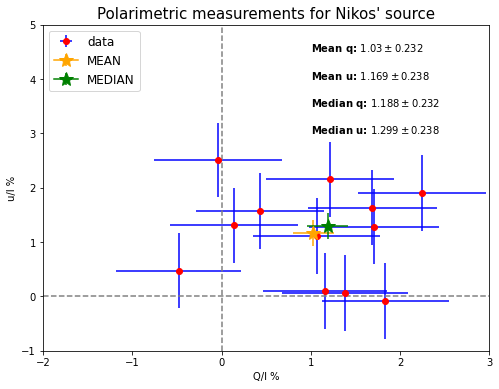

In [3]:
# The basic canvas
plt.figure(figsize=(8, 6))

# Axes labels and title
plt.xlabel('Q/I %')
plt.ylabel('u/I %')
plt.title("Polarimetric measurements for Nikos' source", fontsize=15)

# Axes limits
plt.xlim(-2, 3)
plt.ylim(-1,5)

# Plot the data
plt.errorbar(q_val, u_val, xerr=q_err, yerr=u_err, linestyle='None',
            marker="o", color='red', ecolor='blue', label='data')

# Plot the mean and median values
plt.errorbar(q_mean, u_mean, xerr=q_mean_err, yerr=u_mean_err, 
             color='orange', marker='*', markersize=15, label="MEAN")

plt.errorbar(q_median, u_median, xerr=q_median_err, yerr=u_median_err, 
             color='green', marker='*', markersize=15, label="MEDIAN")

# Add vertical and horizontal lines
plt.axvline(0, linestyle='--', color='grey')
plt.axhline(0, linestyle='--', color='grey')

plt.legend(loc='upper left', fontsize=12)


# Add text
_ = plt.text(1.0, 4.5, r"Mean q: ${} \pm {}$".format(round(q_mean,2), round(q_mean_err,3)), weight='bold')
_ = plt.text(1.0, 4.0, r"Mean u: ${} \pm {}$".format(round(u_mean,3), round(u_mean_err,3)), weight='bold')
_ = plt.text(1.0, 3.5, r"Median q: ${} \pm {}$".format(round(q_median,3), round(q_median_err,3)), weight='bold')
_ = plt.text(1.0, 3.0, r"Median u: ${} \pm {}$".format(round(u_median,3), round(u_median_err,3)), weight='bold')

---

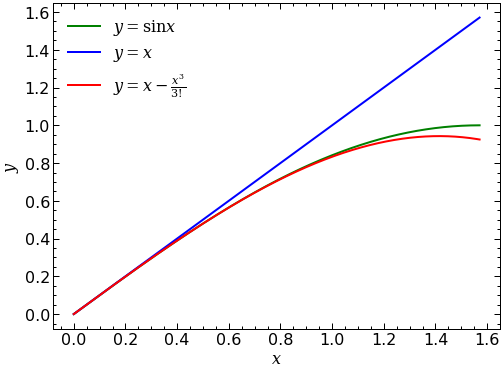

In [4]:
plt.style.use(['science', 'notebook'])

x = np.linspace(0, np.pi/2., 1000)
y1 = np.sin(x)
y2 = x - ((x**3) / np.math.factorial(3))

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.plot(x, y1, c='g', lw=2, label=r'$y=\sin x$')
plt.plot(x, x, c='b', lw=2,  label=r'$y=x$')
plt.plot(x, y2, c='r', lw=2, label=r'$y = x - \frac{x^3}{3!}$')

plt.legend()

# Scipy

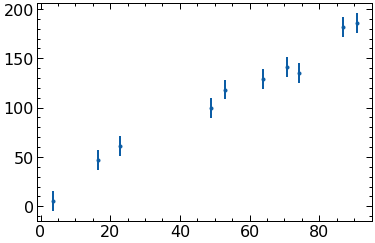

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import scipy.optimize as so


# create some fake data and plot them:
numpoints = 10 # the number of points we want to simulate

x = np.random.uniform(0., 100., numpoints)

# The error on each point comes from a normal distribution
# with sigma = 10
y = 2. * x + 2.6 + np.random.normal(0., 10., numpoints)

_ = plt.errorbar(x, y, yerr=10, fmt=".")

[1.91032747 8.84283231]
[[ 1.22341325e-02 -6.50116475e-01]
 [-6.50116475e-01  4.45469065e+01]]
a = 1.9103274668278705 +/- 0.11060801280198385
b = 8.842832312233112 +/- 6.674346899937693


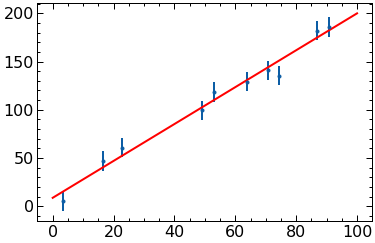

In [6]:
def fit_line(x, a, b):
    return a * x + b

# perform the fit
# Please read carefully the documentation to see how errors
# are handled. In Physics we typically give absolute errors,
# not relative ones!
popt, pcov = so.curve_fit(fit_line, x, y, sigma = np.ones(y.shape) * 10, absolute_sigma=True)

print(popt)
print(pcov)
print(f"a = {popt[0]} +/- {np.sqrt(pcov[0][0])}")
print(f"b = {popt[1]} +/- {np.sqrt(pcov[1][1])}")

x_fit = np.linspace(0.0, 100, 100)
y_fit = fit_line(x_fit, *(popt)
                )
_ = plt.errorbar(x, y, yerr=10, fmt=".")
_ = plt.plot(x_fit, y_fit, 'r-')